In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
df = pd.read_csv('ds_data2.csv')

#df = pd.DataFrame(data)

# Convert EndMonth to a numerical value
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7,
    'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['EndMonth'] = df['EndMonth'].map(month_mapping)

# Calculate the duration of employment in months
df['EndDate'] = pd.to_datetime(df['EndYear'].astype(str) + '-' + df['EndMonth'].astype(str) + '-01')
df['StartDate'] = pd.to_datetime(df['JoiningYear'].astype(str) + '-01-01')
df['DurationMonths'] = (df['EndDate'] - df['StartDate']).dt.total_seconds() / (30 * 24 * 60 * 60)

print(df['DurationMonths'])



0       199.833333
1       175.500000
2       237.366667
3       187.666667
4       150.100000
           ...    
9995    162.300000
9996    175.500000
9997    213.033333
9998    187.666667
9999    250.600000
Name: DurationMonths, Length: 10000, dtype: float64


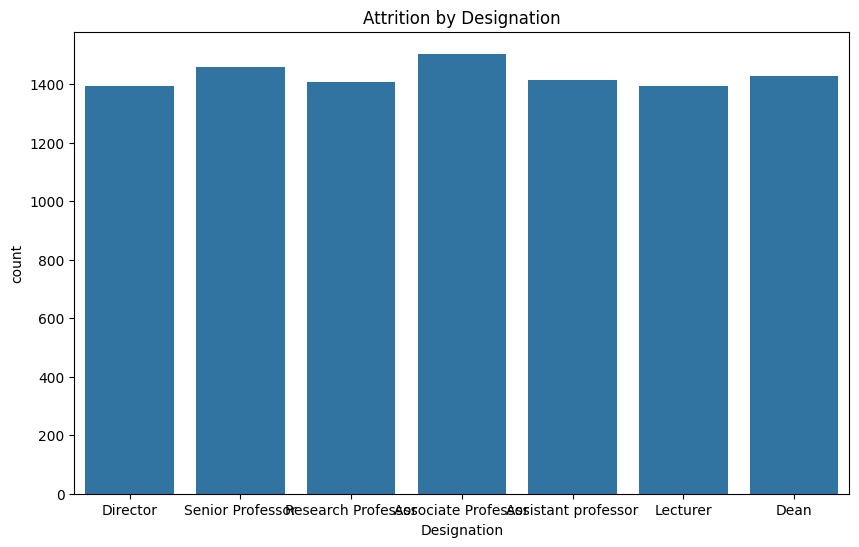

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Attrition by designation
plt.figure(figsize=(10, 6))
sns.countplot(x='Designation', data=df)
plt.title('Attrition by Designation')
plt.show()

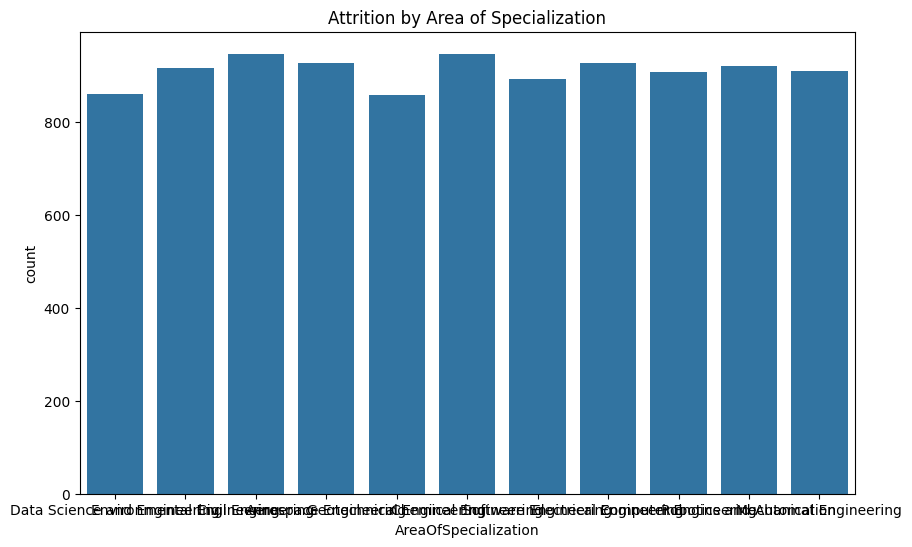

In [9]:
# Attrition by area of specialization
plt.figure(figsize=(10, 6))
sns.countplot(x='AreaOfSpecialization', data=df)
plt.title('Attrition by Area of Specialization')
plt.show()


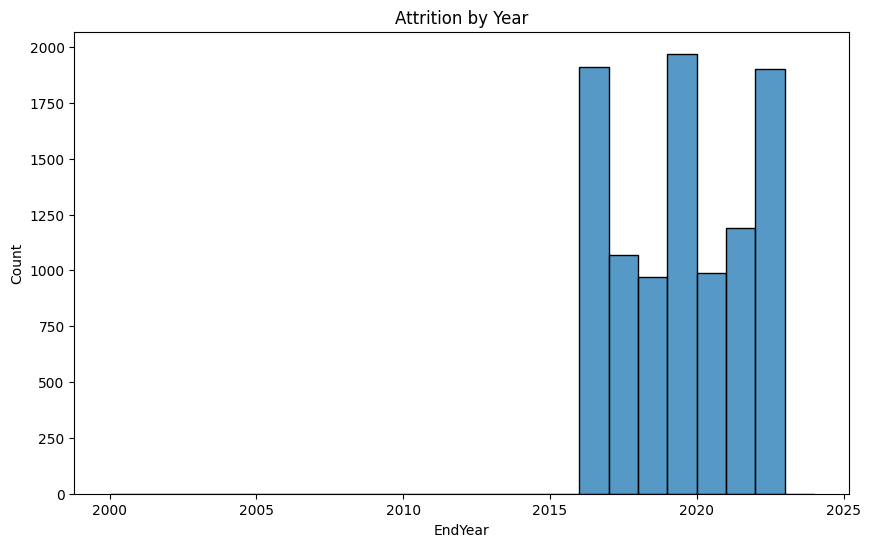

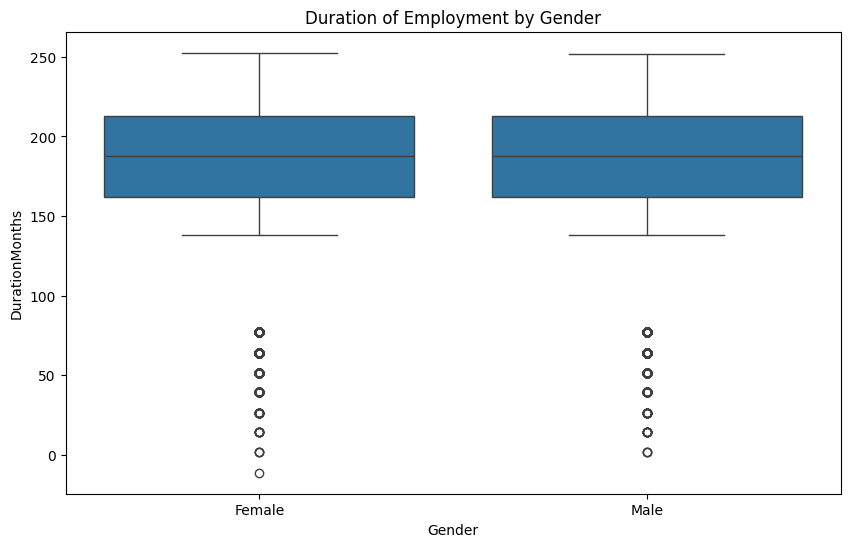

In [4]:
 #Attrition by year
plt.figure(figsize=(10, 6))
sns.histplot(df['EndYear'], bins=range(2000, 2025), kde=False)
plt.title('Attrition by Year')
plt.show()

# Duration of employment by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='DurationMonths', data=df)
plt.title('Duration of Employment by Gender')
plt.show()

In [6]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['Gender', 'Designation', 'AreaOfSpecialization', 'AppointmentType'], drop_first=True)

# Drop unnecessary columns
df = df.drop(columns=['Srno', 'FacultyId', 'Name', 'EndYear', 'EndMonth', 'EndDate', 'StartDate'])

df.columns



Index(['Age', 'JoiningYear', 'DurationMonths', 'Gender_Male',
       'Designation_Associate Professor', 'Designation_Dean',
       'Designation_Director', 'Designation_Lecturer',
       'Designation_Research Professor', 'Designation_Senior Professor',
       'AreaOfSpecialization_Chemical Engineering',
       'AreaOfSpecialization_Civil Engineering',
       'AreaOfSpecialization_Computer Engineering',
       'AreaOfSpecialization_Data Science and Engineering',
       'AreaOfSpecialization_Electrical Engineering',
       'AreaOfSpecialization_Environmental Engineering',
       'AreaOfSpecialization_Geotechnical Engineering',
       'AreaOfSpecialization_Mechanical Engineering',
       'AreaOfSpecialization_Robotics and Automation',
       'AreaOfSpecialization_Software Engineering', 'AppointmentType_Conract',
       'AppointmentType_Regular'],
      dtype='object')

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into features and target variable
X = df.drop(columns=['DurationMonths'])
y = df['DurationMonths']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Model Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")



Model Coefficients: [ 4.48320310e+00 -3.02497422e+00 -5.43537115e-02  3.14612443e-01
  1.23845215e-01 -2.92469374e-01 -4.12391151e-01 -1.54471315e-01
  2.40473814e-03 -2.57430465e-01 -3.47347921e-01  2.97377697e-01
 -1.03160494e+00 -3.05764103e-01 -1.15157165e+00 -1.24380292e-01
  2.17839842e-01 -7.14339150e-01 -7.41267946e-01  8.02344887e-01
 -1.15903523e-01]
Intercept: 6016.773052326507


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 10.42
Mean Squared Error (MSE): 162.59
Root Mean Squared Error (RMSE): 12.75
R-squared (R²): 0.94


Mean Absolute Error (MAE)

MAE: 10.42

Interpretation: The MAE measures the average magnitude of the errors in a set of predictions, without considering their direction (i.e., it does not differentiate between over-prediction and under-prediction). On average, the predictions are off by 10.42 months from the actual duration.

Mean Squared Error (MSE)

MSE: 162.59

Interpretation: The MSE measures the average of the squares of the errors. It gives a higher weight to larger errors, which means it is more sensitive to outliers. A lower MSE indicates a better fit. In this case, the average squared error is 162.59.

Root Mean Squared Error (RMSE)

RMSE: 12.75

Interpretation: The RMSE is the square root of the MSE and provides an error measure in the same units as the target variable (duration in months). This value indicates that the standard deviation of the residuals (prediction errors) is 12.75 months. It is a commonly used metric to compare models because it is interpretable in the context of the data.

R-squared (R²)

R²: 0.94

Interpretation: The R² value measures the proportion of the variance in the dependent variable (duration of employment) that is predictable from the independent variables. An R² value of 0.94 indicates that 94% of the variance in the duration of employment can be explained by the model. This is a very high value, suggesting that the model fits the data well.

Summary

The MAE indicates that, on average, the model's predictions are off by about 10.42 months.
The MSE indicates the average squared difference between the actual and predicted values, with higher sensitivity to outliers.

The RMSE provides a measure of the average error in the same units as the target variable, which is about 12.75 months.

The R² value shows that 94% of the variability in the duration of employment is explained by the model, indicating a strong fit.

These metrics together suggest that model is performing quite well, but the errors (on average) can still be as large as about 10-12 months.


In [16]:
import joblib

# Save the model to a file
joblib.dump(model, 'faculty_forecast.pkl')



['faculty_forecast.pkl']